In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, f1_score, accuracy_score
from sklearn.metrics import r2_score


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

###  1. Загрузите тренировочные и тестовые датасеты

In [2]:
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.5939,273536,0.1046,4,0.4450,0.2745,0.4443,5.9701,0.3003,0.0000,0,49,0.1000,0
1,32,276.7710,173314,0.2247,11,0.4450,0.4391,0.4443,5.9701,0.3003,0.0000,0,60,0.2444,0
2,38,218.5939,28887,0.0325,7,0.4450,0.2745,0.4443,25.6067,0.3003,0.0000,0,50,0.2444,0
3,19,218.5939,427862,0.1793,10,0.0491,0.0450,0.0095,25.6067,0.3003,0.0000,0,35,0.2444,0
4,44,218.5939,109339,0.0325,7,0.0988,0.1157,0.0666,5.9701,0.1136,0.0000,0,46,0.1852,0


In [3]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [4]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.0000,7425.0000,7500.0000,7500.0000,7500.0000,7500.0000,5625.0000,7500.0000,7500.0000,7500.0000,7490.0000,7500.0000,7500.0000,7500.0000,7500.0000
mean,38.5796,238.9053,190384.9868,0.2389,10.0832,0.2389,0.2406,0.2389,23.8933,0.2389,1068.6940,88.9749,40.6708,0.2390,0.2389
std,13.6477,76.1983,105867.4425,0.1517,2.5461,0.1903,0.1474,0.1934,4.4515,0.0877,7430.3448,404.5170,12.3301,0.0417,0.4265
min,17.0000,64.2591,19302.0000,0.0000,1.0000,0.0491,0.0000,0.0095,5.9701,0.1136,0.0000,0.0000,1.0000,0.0001,0.0000
25%,28.0000,218.5939,118019.0000,0.1718,9.0000,0.0491,0.1157,0.0666,25.6067,0.1136,0.0000,0.0000,40.0000,0.2444,0.0000
50%,37.0000,218.5939,179568.5000,0.1793,10.0000,0.0988,0.2416,0.1030,25.6067,0.3003,0.0000,0.0000,40.0000,0.2444,0.0000
75%,47.0000,218.5939,239441.7500,0.2393,12.0000,0.4450,0.4391,0.4443,25.6067,0.3003,0.0000,0.0000,45.0000,0.2444,0.0000
max,90.0000,575.3968,1226583.0000,0.7293,16.0000,0.4450,0.4822,0.4844,25.6067,0.3003,99999.0000,4356.0000,99.0000,0.4667,1.0000


In [5]:
Xtrain.isna().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

Видим что в f2 и f11 можем заполнить пропуски медианой или модой, что как раз укладывается в межквантильный размах от 25 до 75 персентилей так как там одни и теже значения, что касается почти 2000 пропусков в f7 то если мы их будем заполнять разбив по бинам, это все равно будет равносильно заполнить средним, так как медиана и среднее у нас в одном числовом диапозоне, так что можем пропуски там так же заполнить медианой. И того заполним все пропуски по всех столбцах медианным значением для каждого столбца.

In [6]:
Xtrain.fillna(Xtrain.median(), inplace=True)

In [7]:
Xtrain.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

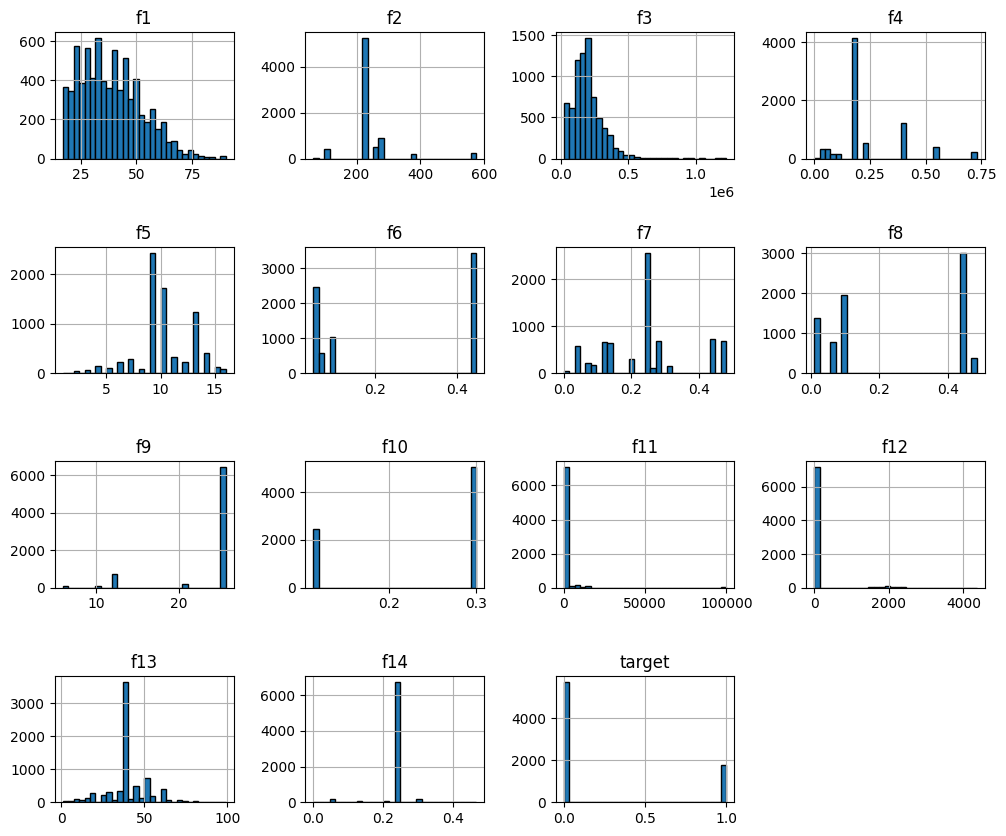

In [8]:
Xtrain.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Как я понимаю здесь главное оценка баланса классов, а не бобрьба с выбросами, потому оставим эту задачу

### 2. Оцените баланс классов в задаче

In [9]:
Xtrain.target.value_counts()

target
0    5708
1    1792
Name: count, dtype: int64

In [10]:
Xtest.target.value_counts()

target
0    1913
1     587
Name: count, dtype: int64

- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

Я думаю что мы не можем использовать здесь accuracy так как у нас все же есть дисбаланс в классах, поэтому accuracy будет не правдаподобна

### 3. Постройте baseline-модель:

- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);

In [11]:
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_unb = log_reg.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1873
           1       0.75      0.26      0.38       602

    accuracy                           0.80      2475
   macro avg       0.78      0.61      0.63      2475
weighted avg       0.79      0.80      0.76      2475



In [13]:
Y_pred_train_log = log_reg.predict(X_train)
Y_pred_test_log = log_reg.predict(X_test)
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_log))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_log))

Тренировочный R^2: -0.10659778905043127
Тестовый R^2: -0.09312613410007242


In [14]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
pred_unb = model_svc.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1873
           1       0.93      0.04      0.08       602

    accuracy                           0.77      2475
   macro avg       0.85      0.52      0.47      2475
weighted avg       0.80      0.77      0.68      2475



In [15]:
Y_pred_train_log = model_svc.predict(X_train)
Y_pred_test_log = model_svc.predict(X_test)
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_log))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_log))

Тренировочный R^2: -0.25194197626899517
Тестовый R^2: -0.26872872592337727


Как мы видим R2 не подходит для оценки качества нашей модели

### 4. Улучшите модели
#### Попробуйте улучшить качество обученных моделей:

- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Создавать новые признаки смысла не вижу, мы не знаем о природе признаков их зависимостях, создавать новые это создавать линейную зависимость между существующими, единственное что здесь вижу это наличие признаков основная масса данных которых заполнена нулями, а так же признаки с низкой кореляцией, вероятно имеет смысл от них избавиться, а дальше уже играться с настройками самой модели.

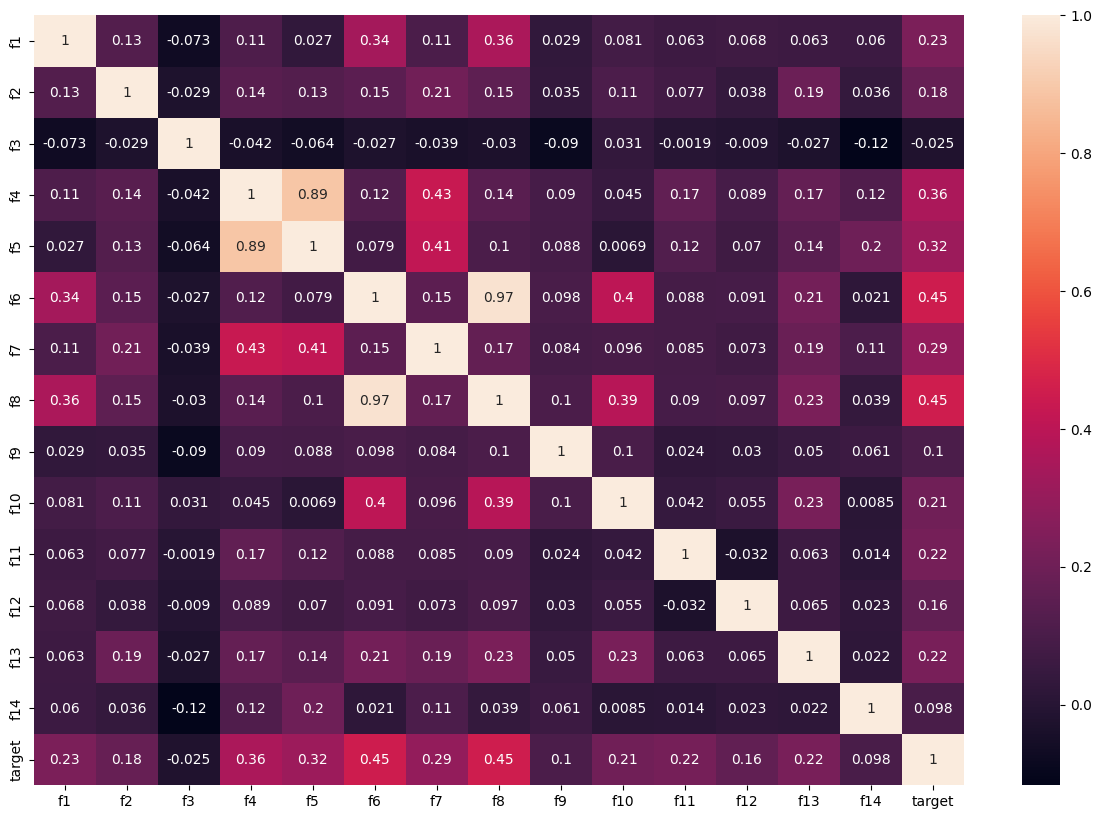

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(Xtrain.corr(), annot=True);

In [17]:
Xtrain_1 = Xtrain.drop(['f3', 'f9', 'f11', 'f12', 'f14'], axis=1)

In [18]:
Xtrain_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f4      7500 non-null   float64
 3   f5      7500 non-null   int64  
 4   f6      7500 non-null   float64
 5   f7      7500 non-null   float64
 6   f8      7500 non-null   float64
 7   f10     7500 non-null   float64
 8   f13     7500 non-null   int64  
 9   target  7500 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 586.1 KB


In [19]:
X = Xtrain_1.drop('target', axis=1)
y = Xtrain_1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg_result = LogisticRegression()
log_reg_result.fit(X_train, y_train)
pred_unb_1 = log_reg_result.predict(X_test)
print(classification_report(y_test, pred_unb_1))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1873
           1       0.66      0.49      0.56       602

    accuracy                           0.81      2475
   macro avg       0.76      0.70      0.72      2475
weighted avg       0.80      0.81      0.80      2475



In [20]:
log_reg_balance_1 = LogisticRegression(class_weight='balanced')
log_reg_balance_1.fit(X_train, y_train)
pred_unb_2 = log_reg_balance_1.predict(X_test)
print(classification_report(y_test, pred_unb_2))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1873
           1       0.53      0.86      0.65       602

    accuracy                           0.78      2475
   macro avg       0.73      0.80      0.74      2475
weighted avg       0.84      0.78      0.79      2475



In [21]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
pred_unb = model_svc.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1873
           1       0.56      0.07      0.13       602

    accuracy                           0.76      2475
   macro avg       0.66      0.53      0.50      2475
weighted avg       0.72      0.76      0.68      2475



In [22]:
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
pred_unb = log_reg.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1873
           1       0.38      0.47      0.42       602

    accuracy                           0.69      2475
   macro avg       0.60      0.61      0.60      2475
weighted avg       0.71      0.69      0.70      2475



In [23]:
model_svc = SVC(class_weight='balanced')
model_svc.fit(X_train, y_train)
pred_unb = model_svc.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1873
           1       0.93      0.13      0.23       602

    accuracy                           0.79      2475
   macro avg       0.85      0.56      0.55      2475
weighted avg       0.82      0.79      0.72      2475



Попробуем все же создать 1 новый признак, посмотрим как это отразится на качестве модели

In [24]:
Xtrain['f11'] = Xtrain['f1'] * Xtrain['f10']

In [25]:
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_unb = log_reg.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1873
           1       0.44      0.11      0.18       602

    accuracy                           0.75      2475
   macro avg       0.60      0.53      0.51      2475
weighted avg       0.69      0.75      0.69      2475



In [26]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
pred_unb = model_svc.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1873
           1       0.00      0.00      0.00       602

    accuracy                           0.76      2475
   macro avg       0.38      0.50      0.43      2475
weighted avg       0.57      0.76      0.65      2475



In [27]:
log_reg_balance = LogisticRegression(class_weight='balanced')
log_reg_balance.fit(X_train, y_train)
pred_unb = log_reg.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1873
           1       0.44      0.11      0.18       602

    accuracy                           0.75      2475
   macro avg       0.60      0.53      0.51      2475
weighted avg       0.69      0.75      0.69      2475



In [28]:
model_svc = SVC(class_weight='balanced')
model_svc.fit(X_train, y_train)
pred_unb = model_svc.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.76      0.34      0.47      1873
           1       0.25      0.67      0.36       602

    accuracy                           0.42      2475
   macro avg       0.51      0.51      0.42      2475
weighted avg       0.64      0.42      0.45      2475



Честно я не понимаю почему такое слабое значение f1 во всех моделях и самый лучший результат это 0.48, возможно это из-за неизвестной для нас природы признаков и их отношений друг с другом..

### 5. Оцените на отложенной выборке качество наилучшей модели

#### В пунктах 3 и 4 вы построили много разных моделей.

#### Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [29]:
X = Xtest.drop(['f3', 'f9', 'f11', 'f12', 'f14', 'target'], axis=1)
y = Xtest['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pred_test_1 = log_reg_balance_1.predict(X_test)
print('f1_score: ', f1_score(y_test, pred_test_1, average='binary'))
print(classification_report(y_test, pred_test_1))

f1_score:  0.4381625441696113
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       648
           1       0.58      0.35      0.44       177

    accuracy                           0.81       825
   macro avg       0.71      0.64      0.66       825
weighted avg       0.79      0.81      0.79       825



In [30]:
X = Xtest.drop(['f3', 'f9', 'f11', 'f12', 'f14', 'target'], axis=1)
y = Xtest['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pred_test_2 = log_reg_result.predict(X_test)
print('f1_score: ', f1_score(y_test, pred_test_2, average='binary'))
print(classification_report(y_test, pred_test_2))

f1_score:  0.022099447513812154
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       648
           1       0.50      0.01      0.02       177

    accuracy                           0.79       825
   macro avg       0.64      0.50      0.45       825
weighted avg       0.73      0.79      0.70       825



In [31]:
X = Xtest.drop(['f3', 'f9', 'f11', 'f12', 'f14', 'target'], axis=1)
y = Xtest['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg_balance_2 = LogisticRegression(class_weight='balanced')
log_reg_balance_2.fit(X_train, y_train)
pred_unb = log_reg_balance_2.predict(X_test)
print('f1_score: ', f1_score(y_test, pred_unb, average='binary'))

f1_score:  0.5485232067510548


Могли бы объяснить почему тут так получается? ведь модель то одна и та же, да обучена на разных данных, вторые я в глаза не видел, но разве такой спад нормальное явление с 65 до 44? модель явно не устойчива

### 6. Выполните хитрый трюк
#### Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.
.

#### Значение  α  подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

#### Удалось ли добиться улучшения качества?

In [40]:
for alpha in np.arange(0, 1, 0.1):
    pred_final = alpha * pred_test_1 + (1 - alpha) * pred_test_2
    print('f1_score: ', f1_score(y_test, np.round(pred_final), average='binary'))

f1_score:  0.022099447513812154
f1_score:  0.022099447513812154
f1_score:  0.022099447513812154
f1_score:  0.022099447513812154
f1_score:  0.022099447513812154
f1_score:  0.022099447513812154
f1_score:  0.4381625441696113
f1_score:  0.4381625441696113
f1_score:  0.4381625441696113
f1_score:  0.4381625441696113


Возможно я что-то не так делаю, но получается что формула не особо работает в моем случае или я её не правильно применяю, и это понятно так как при округлении разумно что при альфа меньше 0.5 результат отдаст предпочтение 1ой модели в полном её предикте, а выше 0.5 другой, не может быть тут среднего результата, подскажите что не так?

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

для baseline-моделей я применил работу с признаки и баланс классов, так же использовал метод опорных векторов но он не сработал от слова совсем, как итог класическая логисчтическая регрессия проявила себя лучше, особенно при исключении признаков имеющих слабую кореляцию с остальными

Максимальное качество которое удалось добиться было 0.44 что очень мало по моим меркам и я не понимаю почему, так как на трейн дата сете максимальное значение было 0.65. Думаю это связано с тем что моя модель не дообучилась.